TEWA 1 tutorial - neural networks
---

*   compare supervised machine learning methods:
logistic regression vs multilayer perceptron using scikit - learn
*   keras libarary:
"regular" neural network vs convolutional neural network


## Import ... 

... standard libraries, classifiers and performance metrics

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets,  metrics
from sklearn.model_selection import train_test_split

# we will encounter these kind of warnings, to suppress them we use a filter
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

## load digits dataset

In [2]:
digits = datasets.load_digits()

np.shape(digits[ 'images'])

(1797, 8, 8)

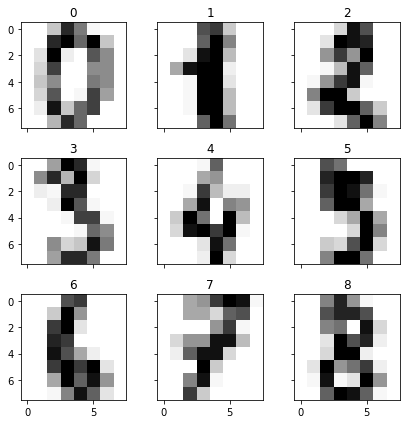

In [3]:
cols = 3
rows = 3

np.random.seed(0)

fig, axs = plt.subplots(cols, rows, figsize = (6, 6), sharex=True, sharey=True,)

for i in range(0,9):
    col = int(np.floor(i / rows))
    row = int(np.ceil(i % cols))
    if row == rows:
        break
    axs[col, row].imshow(digits[ 'images'][i], cmap='Greys');
    axs[col, row].set_title(digits["target"][i])
    
fig.tight_layout()

## training-test split

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

## fit logisitic regression

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='saga', max_iter=100)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print(f"R² on train set: {logreg.score(x_train, y_train):.3f}")
print(f"R² on test set: {logreg.score(x_test,y_test):.3f}")

R² on train set: 1.000
R² on test set: 0.908


### show learning curve including simple k-fold cross validation

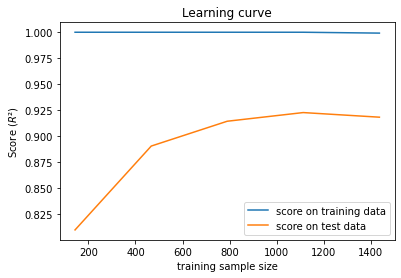

In [14]:
from sklearn.model_selection import learning_curve

X, y = digits["data"], digits["target"]

cv_splits = 5 # cross validation

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(logreg, X, y, cv = cv_splits, return_times = True)

plt.plot(train_sizes, np.mean(train_scores, axis = 1), label = "score on training data")
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = "score on test data")
plt.xlabel("training sample size")
plt.ylabel("Score ($R²$)")
plt.title("Learning curve")
plt.legend();

### Predictions

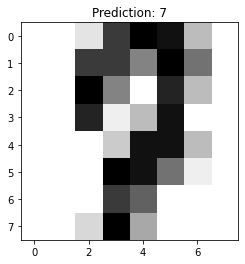

In [15]:
random_image = np.random.choice(len(x_test))

plt.imshow(x_test[random_image].reshape((8, 8)), cmap = "Greys")
plt.title(f"Prediction: {y_pred[random_image]}");

## fit multilayer perceptron

In [20]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(max_iter=100)
MLP.fit(x_train,y_train)
y_pred_MLP = MLP.predict(x_test)

print(f"R² on train set: {MLP.score(x_train, y_train):.3f}")
print(f"R² on test set: {MLP.score(x_test, y_test):.3f}")

R² on train set: 1.000
R² on test set: 0.900


### show learning curve including simple k-fold cross validation

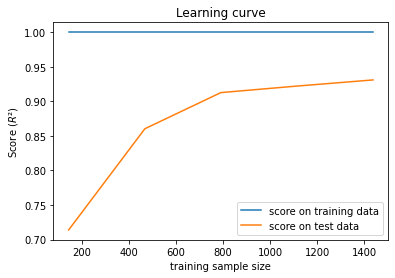

In [21]:
from sklearn.model_selection import learning_curve

cv_splits = 5 # cross validation

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(MLP, X, y, cv = cv_splits, return_times = True)

plt.plot(train_sizes, np.mean(train_scores, axis = 1), label = "score on training data")
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = "score on test data")
plt.xlabel("training sample size")
plt.ylabel("Score ($R²$)")
plt.title("Learning curve")
plt.legend();

### Predictions

Text(0.5, 1.0, 'Prediction: 7')

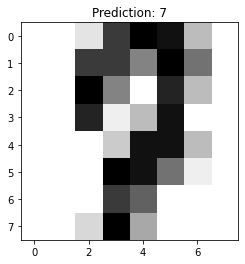

In [22]:
plt.imshow(x_test[random_image].reshape((8, 8)), cmap = "Greys")
plt.title(f"Prediction: {y_pred_MLP[random_image]}")

## Import cifar10 dataset
from the keras libarary 

https://www.cs.toronto.edu/~kriz/cifar.html

In [34]:
from tensorflow import keras

(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

### preprocessing

X_train = X_train / 255.0     
X_train_arr = X_train.reshape(X_train.shape[0], -1) 

X_test = X_test / 255.0
X_test_arr = X_test.reshape(X_test.shape[0], -1)

labels = {0: 'plane',
          1: 'car',
          2: 'bird',
          3: 'cat',
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck'
          }

print("X_train:", np.shape(X_train))
print("X_test: ", np.shape(X_train))

X_train: (50000, 32, 32, 3)
X_test:  (50000, 32, 32, 3)


### visualize some examples in dataset

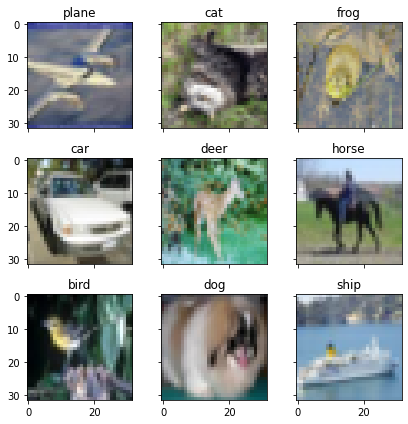

In [27]:
cols = 3
rows = 3

np.random.seed(0)

fig, axs = plt.subplots(cols, rows, figsize = (6, 6), sharex=True, sharey=True,)

for cat in set(Y_train.ravel()):
    row = int(np.floor(cat / rows))
    col = int(np.ceil(cat % cols))
    if row == rows:
        break
    i = np.random.choice(np.where(Y_train.ravel() == cat)[0])
    axs[col, row].imshow(X_train[i], )
    axs[col, row].set_title(f"{labels[cat]}")
    
fig.tight_layout()

## fit multilayer perceptron to the data and evaluate the fit

optional here: confusion matrix

In [28]:
MLP = MLPClassifier(max_iter = 20)
MLP.fit(X_train_arr, Y_train.ravel())

/home/user/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(max_iter=20)

In [29]:
print(f"R² on train set: {MLP.score(X_train_arr, Y_train):.3f}")
print(f"R² on test set: {MLP.score(X_test_arr, Y_test):.3f}")

R² on train set: 0.452
R² on test set: 0.433


### Predictions

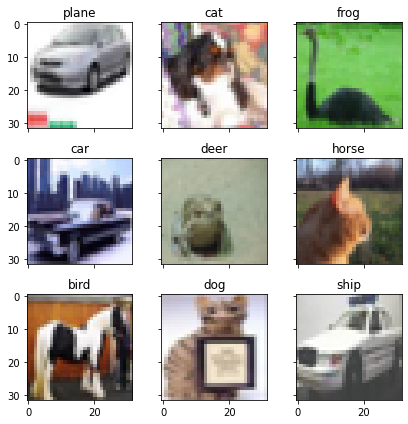

In [30]:
y_test_pred = MLP.predict(X_test_arr)

fig, axs = plt.subplots(cols, rows, figsize = (6, 6), sharex=True, sharey=True,)

for cat in set(y_test_pred.ravel()):
    row = int(np.floor(cat / rows))
    col = int(np.ceil(cat % cols))
    if row == rows:
        break
    i = np.random.choice(np.where(y_test_pred.ravel() == cat)[0])
    axs[col, row].imshow(X_test[i], )
    axs[col, row].set_title(f"{labels[cat]}")
    
fig.tight_layout()

---
**... still to work on it from here onwards ...**

---

## fit neural network with keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### set up network

In [ ]:
NN_model = Sequential()
NN_model.add(Dense(30 , input_dim=#your dimensions, activation='relu'))
NN_model.add(Dense(10, activation='softmax'))

### compile

In [ ]:
NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NN_model.fit(#yourX,yourY, epochs=10, validation_split=0.1)

In [ ]:
_, accuracy = NN_model.evaluate(#your code)


In [ ]:
NN_model.summary()

### fit Convolutional neural network with keras

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten


model_CNN = Sequential()

model_CNN.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=# your dimensions)) 
model_CNN.add(MaxPooling2D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(10, activation='softmax'))

### compile model

In [ ]:
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### fit model

In [ ]:
model_CNN.fit(#your code, your code, epochs=5, validation_split=0.1)

In [ ]:
_, accuracy = model_CNN.evaluate(# your test data)
print(accuracy)

In [ ]:
Preds=model_CNN.predict(# your data)


### confusion matrix on test set
include stimulus names

explore CNN parameters, and how changing them might improve classification on test set